In [2]:
from dis import dis
from tkinter.tix import AUTO
from requests import head
import torch
import config
import os
from glob import glob
from shutil import copyfile
import pandas as pd
import re
import numpy as np
from math import sqrt
import math
import tensorflow as tf
from keras import regularizers
from tensorflow.keras import Model, Sequential
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from re import X
import numpy as np
import torch
import pandas as pd
from torch.nn.utils.rnn import pack_padded_sequence
from torch.utils.data import DataLoader
from CustomDataset import CustomRawDataset
from model_dispatcher import dispatch_model
# from model_dispatcher_cnn import dispatch_model
import config
from torch import nn
import os
from glob import glob
from torch.optim import Adam, SGD
from torch.optim.lr_scheduler import ReduceLROnPlateau
from datetime import date, timedelta, datetime
import time
import random
from torch.utils.tensorboard import SummaryWriter
from CustomDataset import custom_collate_fn
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow import keras

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation,TimeDistributed
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.compat.v1.keras.layers import CuDNNLSTM
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

C:\Users\acer\AppData\Local\Temp\ipykernel_17164\584230919.py:2: DeprecationWarning: The Tix Tk extension is unmaintained, and the tkinter.tix wrapper module is deprecated in favor of tkinter.ttk
  from tkinter.tix import AUTO


In [64]:
raw_angle_files_1 = glob(os.path.join("D:\Research_Project\My_project_22\input\preprocessed", "*", "*.csv"))
# print(raw_angle_files_1)
all_filenames = [i for i in raw_angle_files_1]
df = pd.concat(map(pd.read_csv, all_filenames),ignore_index=True)
data=df
data.to_csv(r"D:\Research_Project\My_project_22\input\final_preprocessed_merged\merged.csv",index=False)
#df=pd.read_csv(r"D:\Research_Project\My_project_22\FEATURES_EXTRACTED\DISTANCES\both_hand_frontup_left_leg_frontup\aatish_both_hand_frontup_left_leg_frontup_trial1_interpolated.csv")
   
# data=df
# print(data.shape)
# target=data['54']
# data=data.drop(['54'],axis=1)
# # data.head()
# print(data.shape)
# AutoEncoder(data)
# data['12']=target
# print(data.shape)

In [1]:
data=pd.read_csv(r"D:\Research_Project\My_project_22\input\final_preprocessed_merged\merged_modified.csv")
data.head()
target=data['target']
data=data.drop(['target'],axis=1)
# data.head()
# print(data.shape)
# AutoEncoder(data)
# data['12']=target
# print(data.shape)
print(data.shape)
print(target.shape)
data.head()

NameError: name 'pd' is not defined

In [31]:
from skfeature.function.similarity_based import fisher_score

import matplotlib.pyplot as plt

%matplotlib inline

# Calculating scores
x=data.to_numpy()
y=target.to_numpy()
top_k=26

ranks = fisher_score.fisher_score(x, y,mode="ranks")


feat_importances=pd.Series(ranks, data.columns[0:len(data.columns)])






In [32]:

sorted_id=[]
#top 26 values
# print(feat_importances[0])
id=0
sorted_feat_importances=[]
feat_imp_index=[i for i in feat_importances.index]
feat_imp_value=[i for i in feat_importances.values]
for i in range(len(feat_importances)):
    if(feat_imp_value[i]<top_k):

        sorted_id.append(feat_imp_index[i])
        sorted_feat_importances.append(feat_imp_value[i])
data=data[sorted_id]

# feat_importances.values

Text(0, 0.5, 'features')

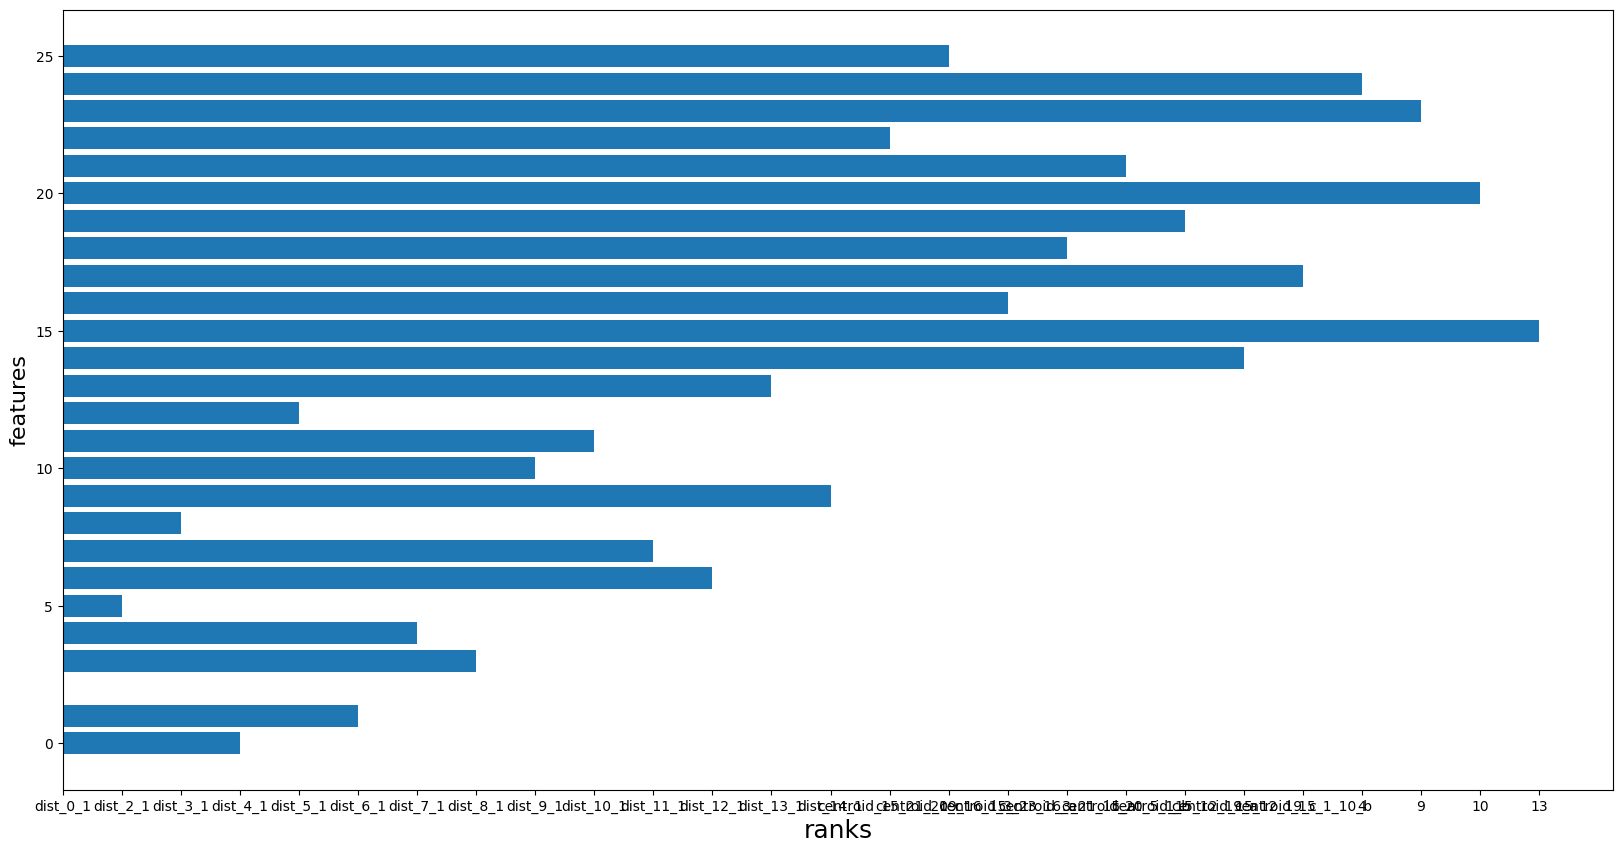

In [57]:
fig=plt.figure(figsize=(20,10))
spacing = 0.1
fig.subplots_adjust(bottom=spacing)
x=sorted_feat_importances
y=sorted_id
plt.barh(x,y)
plt.xlabel('ranks',fontsize=18)
plt.ylabel('features',fontsize=16)

In [28]:
# len1=data.shape[1]
# l1=list(range(0,len1))
# l2=[]
# for i in l1:
#     i=str(i)
#     l2.append(i)
# l1=l2
    
# data.columns=l1
# data.head()
data['target']=target
data.head()

,dist_0_1,dist_2_1,dist_3_1,dist_4_1,dist_5_1,dist_6_1,dist_7_1,dist_8_1,dist_9_1,dist_10_1,...,centroid_3_21_15_a,centroid_20_5_1_b,centroid_15_12_19_a,centroid_15_12_19_c,centroid_15_1_10_b,4,9,10,13,target
0,0.324883,0.314224,0.475169,0.257537,0.224666,0.380845,0.480537,0.253687,0.224452,0.390823,...,0.294137,0.305887,0.346157,2.261033,-0.239840,-0.296553,0.162107,-0.027582,0.031990,0
1,0.322438,0.312178,0.470942,0.260437,0.229644,0.384718,0.450586,0.252057,0.222488,0.390271,...,0.292750,0.300970,0.350710,2.268333,-0.241051,-0.288412,0.157114,-0.009114,0.029938,0
2,0.321594,0.311465,0.469381,0.261410,0.231567,0.386289,0.442863,0.251537,0.221754,0.390644,...,0.292657,0.299360,0.352113,2.270667,-0.241705,-0.288063,0.156264,-0.002401,0.029953,0
3,0.321504,0.311379,0.469090,0.261484,0.231913,0.386717,0.444212,0.251446,0.221688,0.390763,...,0.292577,0.299230,0.352107,2.270800,-0.241827,-0.288264,0.155941,-0.001148,0.030147,0
4,0.321446,0.311360,0.469092,0.261522,0.232146,0.387123,0.445079,0.251438,0.222014,0.390721,...,0.291617,0.299090,0.352097,2.270833,-0.241924,-0.286949,0.155132,-0.000888,0.030157,0


In [29]:
# data.to_csv(r"D:\Research_Project\My_project_22\input\final_preprocessed_merged\fischer_extracted_modified.csv",index=False)

In [30]:
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :26], sequences[end_ix-1, 26:]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [31]:
# raw_angle_files_1 = glob(os.path.join("D:\Research_Project\My_project_22\input\preprocessed_modified", "*", "*.csv"))
# # print(raw_angle_files_1)
# all_filenames = [i for i in raw_angle_files_1]
# df = pd.concat(map(pd.read_csv, all_filenames),ignore_index=True)
data=pd.read_csv(r"D:\Research_Project\My_project_22\input\final_preprocessed_merged\fischer_extracted_modified.csv")
# print(df.shape)
# df = df.sample(frac = 1)
# # df.iloc[1:10,:]
data=pd.get_dummies(data,columns=['target'])
data=data.to_numpy()
x,y=split_sequences(data,6)
# x=x[None:]
# print(x.shape)
# print(y.shape)
# data=data.to_numpy()
print(data.shape)

# y=data.iloc[:,26:]
# x=data.iloc[:,:26]
# # x=data[-1:26]
# print(x.shape)
# print(y.shape)
# x=x.to_numpy()
# y=y.to_numpy()
x_train,x_test,y_train,y_test= train_test_split(x, y, test_size = 0.2)
print(x_train.shape)
print(y_train.shape)
print(type(y_train))



model = Sequential()
model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(6,26)))
model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Flatten())
model.add(Dense(100, activation='relu'))
model.add(layers.BatchNormalization())
model.add(Dense(10, activation='softmax'))

model.summary()


# model.summary()
# # log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# # tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
print(y_train)
print(y_train.shape)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# # print(x.shape)
history = model.fit(x_train, y_train,batch_size=config.BATCH_SIZE,epochs=100,validation_data=(x_test,y_test),verbose=1)
results = model.evaluate(x_test, y_test)
y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)
y_test=np.argmax(y_test,axis=1)
# print(y_pred)
cf_matrix=confusion_matrix(y_test,y_pred)
print('Confusion matrix\n',cf_matrix)
print(classification_report(y_test,y_pred))

(12260, 36)
(9804, 6, 26)
(9804, 10)
<class 'numpy.ndarray'>
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4, 64)             5056      
                                                                 
 conv1d_1 (Conv1D)           (None, 2, 64)             12352     
                                                                 
 dropout (Dropout)           (None, 2, 64)             0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1, 64)            0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 100)               6500  

In [32]:
cf_matrix=confusion_matrix(y_test,y_pred)
print('Confusion matrix\n',cf_matrix)
print(classification_report(y_test,y_pred))

Confusion matrix
 [[211   1  50   7  18   0   0   0   1   9]
 [ 17 156   2   5  19   2   4   0  18   3]
 [  1   8 216   0   8   0   7   0   1  10]
 [  1   7  35 190   3   0   7   4   1   3]
 [  1   0   1   0 246   2   1   0   3   5]
 [  0   1   0   0   9 158  16  19   1   4]
 [  0   0   1   0   5  42 218   3   1   0]
 [  0   0   0   0   1   0   7 221   1   1]
 [  0   0   6   0   8   5   8   4 219  13]
 [  0   0   1   0   0   1   4   2   1 186]]
              precision    recall  f1-score   support

           0       0.91      0.71      0.80       297
           1       0.90      0.69      0.78       226
           2       0.69      0.86      0.77       251
           3       0.94      0.76      0.84       251
           4       0.78      0.95      0.85       259
           5       0.75      0.76      0.76       208
           6       0.80      0.81      0.80       270
           7       0.87      0.96      0.91       231
           8       0.89      0.83      0.86       263
          

In [33]:
print('specificity:')
tot=0
for i in range (10):
    sum=0
    for j in range(10):
        sum=sum+cf_matrix[i,j]
    spec=cf_matrix[i,i]/sum
    tot+=spec
    print(i," ",spec)
print('specificity avg\n',tot/10)

specificity:
0   0.7104377104377104
1   0.6902654867256637
2   0.8605577689243028
3   0.7569721115537849
4   0.9498069498069498
5   0.7596153846153846
6   0.8074074074074075
7   0.9567099567099567
8   0.8326996197718631
9   0.9538461538461539
specificity avg
 0.8278318549799177


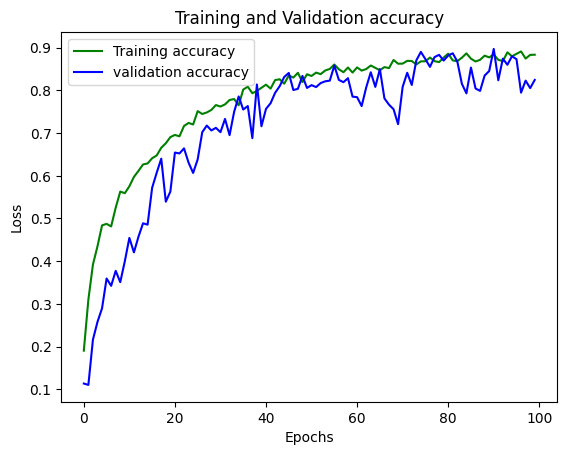

In [34]:
loss_train = history.history["accuracy"]
loss_val = history.history["val_accuracy"]
epochs = range(1,99)
plt.plot(loss_train, 'g', label='Training accuracy')
plt.plot(loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

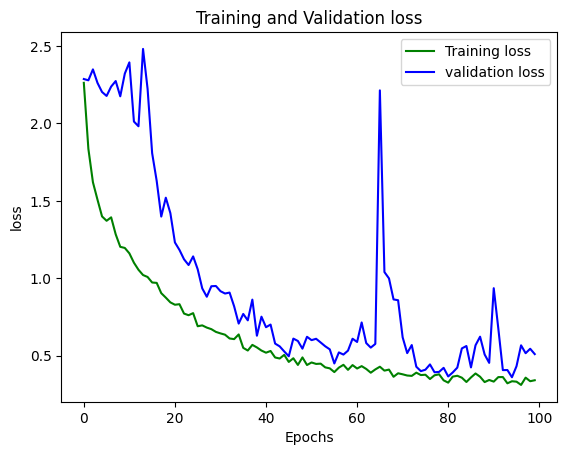

In [35]:
loss_train = history.history["loss"]
loss_val = history.history["val_loss"]
epochs = range(1,99)
plt.plot(loss_train, 'g', label='Training loss')
plt.plot(loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
#learning rate,pool size and kernel size graph


In [3]:
data=pd.read_csv(r"D:\Research_Project\My_project_22\input\final_preprocessed_merged\merged_modified.csv")
data.head()
target=data['target']
data=data.drop(['target'],axis=1)
# data.head()
# print(data.shape)
# AutoEncoder(data)
# data['12']=target
# print(data.shape)
print(data.shape)
print(target.shape)
data.head()

(12260, 166)
(12260,)


,dist_0_1,dist_2_1,dist_3_1,dist_4_1,dist_5_1,dist_6_1,dist_7_1,dist_8_1,dist_9_1,dist_10_1,...,5,6,7,8,9,10,11,12,13,14
0,0.324883,0.314224,0.475169,0.257537,0.224666,0.380845,0.480537,0.253687,0.224452,0.390823,...,1.597459,-0.140846,1.246003,0.169821,0.162107,-0.027582,0.081955,0.113375,0.031990,0.131282
1,0.322438,0.312178,0.470942,0.260437,0.229644,0.384718,0.450586,0.252057,0.222488,0.390271,...,1.614270,-0.147442,1.296214,0.211502,0.157114,-0.009114,0.106628,0.088090,0.029938,0.127583
2,0.321594,0.311465,0.469381,0.261410,0.231567,0.386289,0.442863,0.251537,0.221754,0.390644,...,1.619788,-0.148863,1.306293,0.224825,0.156264,-0.002401,0.115748,0.079567,0.029953,0.126045
3,0.321504,0.311379,0.469090,0.261484,0.231913,0.386717,0.444212,0.251446,0.221688,0.390763,...,1.619716,-0.148812,1.302433,0.224631,0.155941,-0.001148,0.116238,0.078291,0.030147,0.125562
4,0.321446,0.311360,0.469092,0.261522,0.232146,0.387123,0.445079,0.251438,0.222014,0.390721,...,1.619620,-0.149545,1.296863,0.226248,0.155132,-0.000888,0.115037,0.077394,0.030157,0.125631


In [5]:
from skfeature.function.similarity_based import fisher_score

import matplotlib.pyplot as plt

%matplotlib inline

# Calculating scores
x=data.to_numpy()
y=target.to_numpy()
top_k=60

ranks = fisher_score.fisher_score(x, y,mode="ranks")


feat_importances=pd.Series(ranks, data.columns[0:len(data.columns)])

In [6]:

sorted_id=[]
#top 26 values
# print(feat_importances[0])
id=0
sorted_feat_importances=[]
feat_imp_index=[i for i in feat_importances.index]
feat_imp_value=[i for i in feat_importances.values]
for i in range(len(feat_importances)):
    if(feat_imp_value[i]<top_k):

        sorted_id.append(feat_imp_index[i])
        sorted_feat_importances.append(feat_imp_value[i])
data=data[sorted_id]

In [7]:
# len1=data.shape[1]
# l1=list(range(0,len1))
# l2=[]
# for i in l1:
#     i=str(i)
#     l2.append(i)
# l1=l2
    
# data.columns=l1
# data.head()
data['target']=target
data.head()

,dist_0_1,dist_2_1,dist_3_1,dist_4_1,dist_5_1,dist_6_1,dist_7_1,dist_8_1,dist_9_1,dist_10_1,...,6,7,8,9,10,11,12,13,14,target
0,0.324883,0.314224,0.475169,0.257537,0.224666,0.380845,0.480537,0.253687,0.224452,0.390823,...,-0.140846,1.246003,0.169821,0.162107,-0.027582,0.081955,0.113375,0.031990,0.131282,0
1,0.322438,0.312178,0.470942,0.260437,0.229644,0.384718,0.450586,0.252057,0.222488,0.390271,...,-0.147442,1.296214,0.211502,0.157114,-0.009114,0.106628,0.088090,0.029938,0.127583,0
2,0.321594,0.311465,0.469381,0.261410,0.231567,0.386289,0.442863,0.251537,0.221754,0.390644,...,-0.148863,1.306293,0.224825,0.156264,-0.002401,0.115748,0.079567,0.029953,0.126045,0
3,0.321504,0.311379,0.469090,0.261484,0.231913,0.386717,0.444212,0.251446,0.221688,0.390763,...,-0.148812,1.302433,0.224631,0.155941,-0.001148,0.116238,0.078291,0.030147,0.125562,0
4,0.321446,0.311360,0.469092,0.261522,0.232146,0.387123,0.445079,0.251438,0.222014,0.390721,...,-0.149545,1.296863,0.226248,0.155132,-0.000888,0.115037,0.077394,0.030157,0.125631,0


In [8]:
data.to_csv(r"D:\Research_Project\My_project_22\input\final_preprocessed_merged\fischer_extracted_extended_modified.csv",index=False)

In [49]:
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :60], sequences[end_ix-1, 60:]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [72]:
# raw_angle_files_1 = glob(os.path.join("D:\Research_Project\My_project_22\input\preprocessed_modified", "*", "*.csv"))
# # print(raw_angle_files_1)
# all_filenames = [i for i in raw_angle_files_1]
# df = pd.concat(map(pd.read_csv, all_filenames),ignore_index=True)
# data=pd.read_csv(r"D:\Research_Project\My_project_22\input\final_preprocessed_merged\tree_classifier_extracted.csv")
# print(df.shape)
# df = df.sample(frac = 1)
# # df.iloc[1:10,:]


list_train_accuracy=[]
list_val_accuracy=[]
for pool in range(2,5):
    data=pd.read_csv(r"D:\Research_Project\My_project_22\input\final_preprocessed_merged\fischer_extracted_extended_modified.csv")
    data=pd.get_dummies(data,columns=['target'])
    data=data.to_numpy()
    x,y=split_sequences(data,20)
    # x=x[None:]
    # print(x.shape)
    # print(y.shape)
    # data=data.to_numpy()
    print(data.shape)

    # y=data.iloc[:,26:]
    # x=data.iloc[:,:26]
    # # x=data[-1:26]
    # print(x.shape)
    # print(y.shape)
    # x=x.to_numpy()
    # y=y.to_numpy()
    print("pool size ",pool)
    x_train,x_test,y_train,y_test= train_test_split(x, y, test_size = 0.2)
    print(x_train.shape)
    print(y_train.shape)
    print(type(y_train))
    # print(" kernel size : ",filter_size)
    model = Sequential()
    model.add(layers.Conv1D(filters=64, kernel_size=9, activation='relu', input_shape=(20,60)))
    model.add(layers.Conv1D(filters=64, kernel_size=9, activation='relu'))
    model.add(Dropout(0.5))
    model.add(layers.MaxPooling1D(pool_size=pool))
    model.add(layers.Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(Dense(10, activation='softmax'))

    model.summary()


    # model.summary()
    # # log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    # # tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
    # print(y_train)
    # print(y_train.shape)

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # # print(x.shape)
    history = model.fit(x_train, y_train,batch_size=config.BATCH_SIZE,epochs=100,validation_data=(x_test,y_test),verbose=1)
    results = model.evaluate(x_test, y_test)
    y_pred=model.predict(x_test)
    y_pred=np.argmax(y_pred,axis=1)
    y_test=np.argmax(y_test,axis=1)
    list_train_accuracy.append(history.history["accuracy"][-1])
    list_val_accuracy.append(history.history["val_accuracy"][-1])
    print(y_pred)
    cf_matrix=confusion_matrix(y_test,y_pred)
    print('Confusion matrix\n',cf_matrix)
    print(classification_report(y_test,y_pred))

(12260, 70)
pool size  2
(9792, 20, 60)
(9792, 10)
<class 'numpy.ndarray'>
Model: "sequential_58"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_116 (Conv1D)         (None, 12, 64)            34624     
                                                                 
 conv1d_117 (Conv1D)         (None, 4, 64)             36928     
                                                                 
 dropout_58 (Dropout)        (None, 4, 64)             0         
                                                                 
 max_pooling1d_58 (MaxPoolin  (None, 2, 64)            0         
 g1D)                                                            
                                                                 
 flatten_57 (Flatten)        (None, 128)               0         
                                                                 
 dense_114 (Dense)           (None, 100)    

In [51]:
list_train_accuracy
# list_val_accuracy

[0.9782475233078003,
 0.9796772599220276,
 0.9620097875595093,
 0.9535334706306458,
 0.9728349447250366]

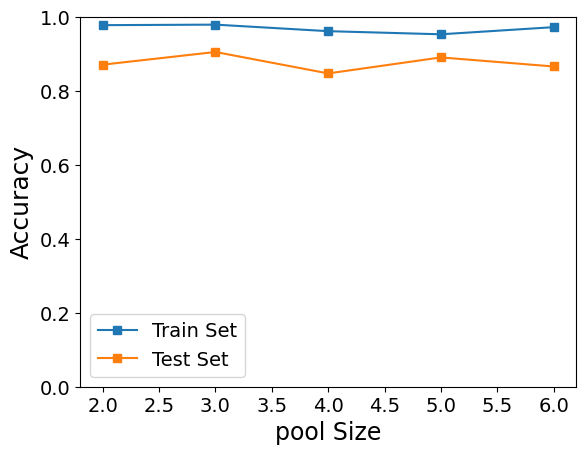

In [52]:
import matplotlib.pyplot as plt 
plt.figure()
plt.plot( range( 2, 7 ),list_train_accuracy, marker = 's' )
plt.plot( range( 2, 7),list_val_accuracy, marker = 's' )
plt.xlabel( 'pool Size', fontsize = 17 )
plt.ylabel( 'Accuracy', fontsize = 18 )
plt.legend(['Train Set', 'Test Set'], loc='best',fontsize = 14)
plt.ylim(0,1)
plt.xticks( fontsize = 14 )
plt.yticks( fontsize = 14 )
plt.show()

In [70]:
# raw_angle_files_1 = glob(os.path.join("D:\Research_Project\My_project_22\input\preprocessed_modified", "*", "*.csv"))
# # print(raw_angle_files_1)
# all_filenames = [i for i in raw_angle_files_1]
# df = pd.concat(map(pd.read_csv, all_filenames),ignore_index=True)
# data=pd.read_csv(r"D:\Research_Project\My_project_22\input\final_preprocessed_merged\tree_classifier_extracted.csv")
# print(df.shape)
# df = df.sample(frac = 1)
# # df.iloc[1:10,:]


list_train_accuracy=[]
list_val_accuracy=[]
for filter_size in range(2,11):
    data=pd.read_csv(r"D:\Research_Project\My_project_22\input\final_preprocessed_merged\fischer_extracted_extended_modified.csv")
    data=pd.get_dummies(data,columns=['target'])
    data=data.to_numpy()
    x,y=split_sequences(data,20)
    # x=x[None:]
    # print(x.shape)
    # print(y.shape)
    # data=data.to_numpy()
    print(data.shape)

    # y=data.iloc[:,26:]
    # x=data.iloc[:,:26]
    # # x=data[-1:26]
    # print(x.shape)
    # print(y.shape)
    # x=x.to_numpy()
    # y=y.to_numpy()
    x_train,x_test,y_train,y_test= train_test_split(x, y, test_size = 0.2)
    print(x_train.shape)
    print(y_train.shape)
    print(type(y_train))
    print(" kernel size : ",filter_size)
    model = Sequential()
    model.add(layers.Conv1D(filters=64, kernel_size=filter_size, activation='relu', input_shape=(20,60)))
    model.add(layers.Conv1D(filters=64, kernel_size=filter_size, activation='relu'))
    model.add(Dropout(0.5))
    model.add(layers.MaxPooling1D(pool_size=2))
    model.add(layers.Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(Dense(10, activation='softmax'))

    model.summary()


    # model.summary()
    # # log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    # # tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
    # print(y_train)
    # print(y_train.shape)

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # # print(x.shape)
    history = model.fit(x_train, y_train,batch_size=config.BATCH_SIZE,epochs=100,validation_data=(x_test,y_test),verbose=1)
    results = model.evaluate(x_test, y_test)
    y_pred=model.predict(x_test)
    y_pred=np.argmax(y_pred,axis=1)
    y_test=np.argmax(y_test,axis=1)
    list_train_accuracy.append(history.history["accuracy"][-1])
    list_val_accuracy.append(history.history["val_accuracy"][-1])
    print(y_pred)
    cf_matrix=confusion_matrix(y_test,y_pred)
    print('Confusion matrix\n',cf_matrix)
    print(classification_report(y_test,y_pred))

(12260, 70)
(9792, 20, 60)
(9792, 10)
<class 'numpy.ndarray'>
 kernel size :  2
Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_98 (Conv1D)          (None, 19, 64)            7744      
                                                                 
 conv1d_99 (Conv1D)          (None, 18, 64)            8256      
                                                                 
 dropout_49 (Dropout)        (None, 18, 64)            0         
                                                                 
 max_pooling1d_49 (MaxPoolin  (None, 9, 64)            0         
 g1D)                                                            
                                                                 
 flatten_48 (Flatten)        (None, 576)               0         
                                                                 
 dense_96 (Dense)            (None, 100

In [67]:
print(list_train_accuracy)
print(list_val_accuracy)

[0.9886642098426819, 0.983047366142273, 0.9720180034637451, 0.9810048937797546, 0.9881535768508911, 0.9895833134651184, 0.969464898109436, 0.9534313678741455, 0.9097222089767456]
[0.15720702707767487, 0.36831361055374146, 0.8542262315750122, 0.813393235206604, 0.9093507528305054, 0.6002449989318848, 0.8844426274299622, 0.9526337385177612, 0.8178848624229431]


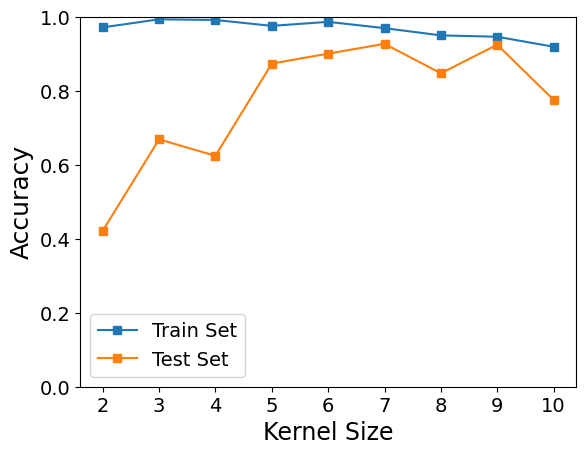

In [71]:
import matplotlib.pyplot as plt 
plt.figure()
plt.plot( range( 2, 11 ),list_train_accuracy, marker = 's' )
plt.plot( range( 2, 11),list_val_accuracy, marker = 's' )
plt.xlabel( 'Kernel Size', fontsize = 17 )
plt.ylabel( 'Accuracy', fontsize = 18 )
plt.legend(['Train Set', 'Test Set'], loc='best',fontsize = 14)
plt.ylim(0,1)
plt.xticks( fontsize = 14 )
plt.yticks( fontsize = 14 )
plt.show()


In [56]:
cf_matrix=confusion_matrix(y_test,y_pred)
print('Confusion matrix\n',cf_matrix)
print(classification_report(y_test,y_pred))

Confusion matrix
 [[178   0   1   5  11   0  51   0   0   1]
 [  1 142   9  33   5   5  21   0  17   2]
 [  2   0 206   2  10   0  11   6  11   7]
 [  0   0  11 237   0   4   3   0   0   2]
 [  0   0   0   2 224   0  11   0   3   0]
 [  0   0   0   0  11 157  28   2   5   4]
 [  0   1   0   0   1   0 297   0   5   1]
 [  0   0   2   0   2   0  28 173  10  20]
 [  0   0   0   0   7   0   7   0 243  10]
 [  0   0   0   0   6   1  12   2   4 176]]
              precision    recall  f1-score   support

           0       0.98      0.72      0.83       247
           1       0.99      0.60      0.75       235
           2       0.90      0.81      0.85       255
           3       0.85      0.92      0.88       257
           4       0.81      0.93      0.87       240
           5       0.94      0.76      0.84       207
           6       0.63      0.97      0.77       305
           7       0.95      0.74      0.83       235
           8       0.82      0.91      0.86       267
          

In [58]:
adam_optimisers=[]
list_learning_rate=[]
opt = keras.optimizers.Adam(learning_rate=0.01)
adam_optimisers.append(opt)
list_learning_rate.append(0.01)
opt = keras.optimizers.Adam(learning_rate=0.02)
adam_optimisers.append(opt)
list_learning_rate.append(0.02)
opt = keras.optimizers.Adam(learning_rate=0.03)
adam_optimisers.append(opt)
list_learning_rate.append(0.03)
opt = keras.optimizers.Adam(learning_rate=0.04)
adam_optimisers.append(opt)
list_learning_rate.append(0.04)
opt = keras.optimizers.Adam(learning_rate=0.05)
adam_optimisers.append(opt)
list_learning_rate.append(0.05)
opt = keras.optimizers.Adam(learning_rate=0.06)
adam_optimisers.append(opt)
list_learning_rate.append(0.06)
opt = keras.optimizers.Adam(learning_rate=0.07)
adam_optimisers.append(opt)
list_learning_rate.append(0.07)
opt = keras.optimizers.Adam(learning_rate=0.08)
adam_optimisers.append(opt)
list_learning_rate.append(0.08)
opt = keras.optimizers.Adam(learning_rate=0.09)
adam_optimisers.append(opt)
list_learning_rate.append(0.09)
opt = keras.optimizers.Adam(learning_rate=0.10)
adam_optimisers.append(opt)
list_learning_rate.append(0.10)
opt = keras.optimizers.Adam(learning_rate=0.11)
adam_optimisers.append(opt)
list_learning_rate.append(0.11)
opt = keras.optimizers.Adam(learning_rate=0.12)
adam_optimisers.append(opt)
list_learning_rate.append(0.12)
opt = keras.optimizers.Adam(learning_rate=0.13)
adam_optimisers.append(opt)
list_learning_rate.append(0.13)




In [59]:

# raw_angle_files_1 = glob(os.path.join("D:\Research_Project\My_project_22\input\preprocessed_modified", "*", "*.csv"))
# # print(raw_angle_files_1)
# all_filenames = [i for i in raw_angle_files_1]
# df = pd.concat(map(pd.read_csv, all_filenames),ignore_index=True)
# data=pd.read_csv(r"D:\Research_Project\My_project_22\input\final_preprocessed_merged\tree_classifier_extracted.csv")
# print(df.shape)
# df = df.sample(frac = 1)
# # df.iloc[1:10,:]


list_train_accuracy=[]
list_val_accuracy=[]
for opt in adam_optimisers:
    data=pd.read_csv(r"D:\Research_Project\My_project_22\input\final_preprocessed_merged\fischer_extracted_extended_modified.csv")
    data=pd.get_dummies(data,columns=['target'])
    data=data.to_numpy()
    x,y=split_sequences(data,20)
    # x=x[None:]
    # print(x.shape)
    # print(y.shape)
    # data=data.to_numpy()
    print(data.shape)

    # y=data.iloc[:,26:]
    # x=data.iloc[:,:26]
    # # x=data[-1:26]
    # print(x.shape)
    # print(y.shape)
    # x=x.to_numpy()
    # y=y.to_numpy()
    x_train,x_test,y_train,y_test= train_test_split(x, y, test_size = 0.2)
    print(x_train.shape)
    print(y_train.shape)
    print(type(y_train))
    
    model = Sequential()
    model.add(layers.Conv1D(filters=64, kernel_size=7, activation='relu', input_shape=(20,60)))
    model.add(layers.Conv1D(filters=64, kernel_size=7, activation='relu'))
    model.add(Dropout(0.5))
    model.add(layers.MaxPooling1D(pool_size=2))
    model.add(layers.Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(Dense(10, activation='softmax'))

    model.summary()


    # model.summary()
    # # log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    # # tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
    # print(y_train)
    # print(y_train.shape)

    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    # # print(x.shape)
    history = model.fit(x_train, y_train,batch_size=config.BATCH_SIZE,epochs=100,validation_data=(x_test,y_test),verbose=1)
    results = model.evaluate(x_test, y_test)
    y_pred=model.predict(x_test)
    y_pred=np.argmax(y_pred,axis=1)
    y_test=np.argmax(y_test,axis=1)
    list_train_accuracy.append(history.history["accuracy"][-1])
    list_val_accuracy.append(history.history["val_accuracy"][-1])
    print(y_pred)
    cf_matrix=confusion_matrix(y_test,y_pred)
    print('Confusion matrix\n',cf_matrix)
    print(classification_report(y_test,y_pred))

(12260, 70)
(9792, 20, 60)
(9792, 10)
<class 'numpy.ndarray'>
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_28 (Conv1D)          (None, 14, 64)            26944     
                                                                 
 conv1d_29 (Conv1D)          (None, 8, 64)             28736     
                                                                 
 dropout_14 (Dropout)        (None, 8, 64)             0         
                                                                 
 max_pooling1d_14 (MaxPoolin  (None, 4, 64)            0         
 g1D)                                                            
                                                                 
 flatten_14 (Flatten)        (None, 256)               0         
                                                                 
 dense_28 (Dense)            (None, 100)               25

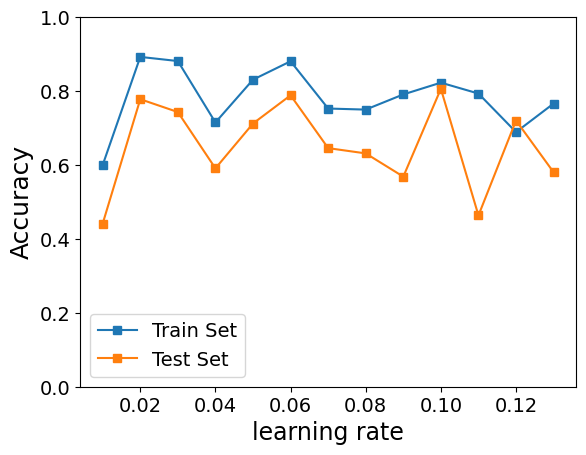

In [61]:
import matplotlib.pyplot as plt 
plt.figure()
plt.plot( list_learning_rate,list_train_accuracy, marker = 's' )
plt.plot( list_learning_rate ,list_val_accuracy, marker = 's' )
plt.xlabel( 'learning rate', fontsize = 17 )
plt.ylabel( 'Accuracy', fontsize = 18 )
plt.legend(['Train Set', 'Test Set'], loc='best',fontsize = 14)
plt.ylim(0,1)
plt.xticks( fontsize = 14 )
plt.yticks( fontsize = 14 )
plt.show()

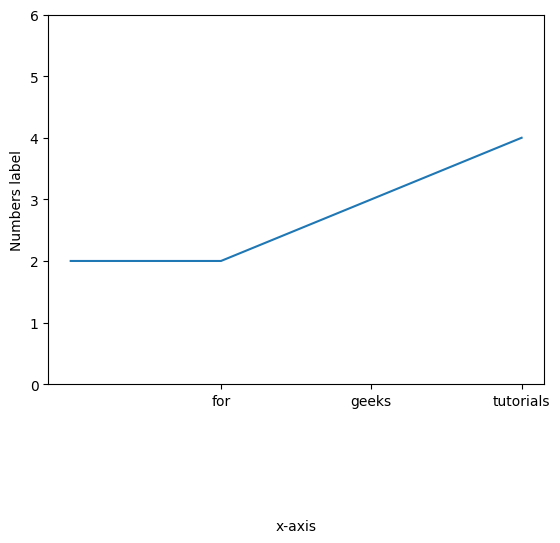

In [22]:

import matplotlib.pyplot as plt
  
# setting x values
x =['Geeks', 'for', 'geeks', 'tutorials']
  
# Setting y values 
y =[2,2, 3, 4]
fig,ax=plt.subplots()
  
# Adding label on the y-axis
plt.ylabel('Numbers label')
plt.xlabel('x-axis',labelpad=80)
plt.ylim(0,6)
ax.set_xticks([1,2,3,4,5])

  
# plotting the graph
plt.plot(x, y)


TypeError: Axis.set_ticks() missing 1 required positional argument: 'ticks'

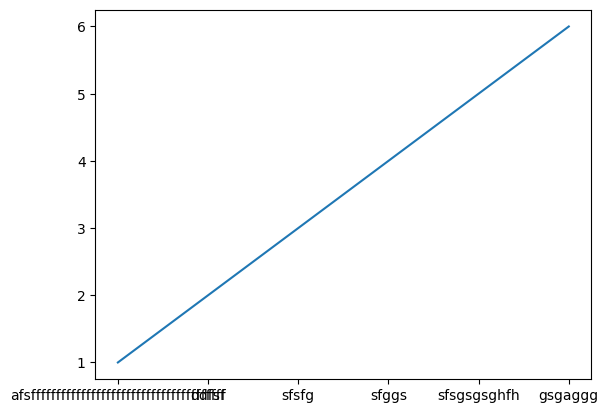

In [45]:

# importing libraries
import matplotlib.pyplot as plt
import numpy as np
 
# create data
x = ['afsfffffffffffffffffffffffffffffffffffffff','ddfsf','sfsfg','sfggs','sfsgsgsghfh','gsgaggg']
y = np.arange(1,7,1)
 
# make objects of subplots
fig, ax = plt.subplots()
 
# plot the data
ax.plot(x, y)
 
# change the fontsize
# ax.set_xticklabels(x, fontsize=20)
ax.set_xticks(spacing=30)
 
# show the plot
plt.show()

In [34]:
x = list(range(1, 11, 1))
x
y = np.log(x)
y

array([0.        , 0.69314718, 1.09861229, 1.38629436, 1.60943791,
       1.79175947, 1.94591015, 2.07944154, 2.19722458, 2.30258509])